# CS5242 Workspace

## Helper Functions

In [1]:
import torch
import matplotlib.pyplot as plt
import math
import torchviz

In [3]:
import torch

def load_data(filename):
    # Open the files
    with open(filename, "r") as file:
        # Read the lines
        lines = file.readlines()
        
        # Initialize empty lists for data and labels
        data = []

        # Loop over the lines
        for i, line in enumerate(lines):
            # Strip the newline characters
            line = line.strip("\n")

            # Convert the strings to floats
            value = float(line)

            # Append the values to the lists
            data.append(value)

    return torch.tensor(data)

inputs = load_data("./data/2-1-x.txt")
outputs = load_data("./data/2-1-f_x.txt")

print(inputs)
print(outputs)

tensor([-5.0000, -4.9990, -4.9980,  ...,  4.9980,  4.9990,  5.0000])
tensor([3.7339e-01, 3.7368e-01, 3.7396e-01,  ..., 3.3600e-04, 3.3600e-04,
        3.3500e-04])


## Question 1
 1. The MNIST data set has 60,000 training samples and 10,000 validations. MNIST is grayscale with 28x28x1 pixels. Suppose we consider MNIST as binary images, only black and white pixels after thresholding. How many mathematically possible binary images are there for a 28x28x1 image? Let k be the number you calculated. What is (60, 000 + 10, 000)/k?

In [28]:
length = 28
width = 28
values_per_pixel = 2e0 # black and white

total_num_pixels = length * width
total_possible_images = values_per_pixel ** total_num_pixels

training_set = 60000
validation_set = 10000

ratio_of_images_to_possibilities = (training_set + validation_set) / total_possible_images

print("ratio_of_images_to_possibilities: ", ratio_of_images_to_possibilities)

ratio_of_images_to_possibilities:  6.879889127682485e-232


2. Suppose the average mobile phone has 1000 images, and there are 8 billion mobile phones worldwide. How many images are there on mobile phones in the world? We suppose that this number is roughly equal to all the pictures there are in the whole world. Let n be the number you calculated. Compute the ratio n/k.

In [26]:
total_num_pictures_in_the_world = 1000 * (8 * 10 ** 9)
ratio_of_images_to_possibilities = total_num_pictures_in_the_world / total_possible_images

print("ratio_of_images_to_possibilities: ", ratio_of_images_to_possibilities)

ratio_of_images_to_possibilities:  7.862730431637126e-224


3. Now consider that mobile phone images are much larger than 28x28x1. Say they are 1000x1000x3 binary pixels. How many mathematically possible images are there? Let this number be m. Calculate the ratio n/m.

In [33]:
from decimal import *
import gmpy2

length = 1000
width = 1000
values_per_pixel = 2e3

total_num_pixels = length * width
total_possible_images = gmpy2.mpz(values_per_pixel) ** gmpy2.mpz(total_num_pixels)

ratio_of_images_to_possibilities = total_num_pictures_in_the_world / total_possible_images 

print("ratio_of_images_to_possibilities: ", ratio_of_images_to_possibilities)

ratio_of_images_to_possibilities:  8.0802724735842415e-3301018



4. What is the significance of the ratios computed? What does it mean when the ratio is small/large? How does this relate to the curse of dimensionality?

n/k and n/m both represent the ratio of images to possible outcomes. The smaller the ratio, the less data you have to cover the possible outcome space. The curse of dimensionality refers to when the dimensionality increases, the volume of the space increases so fast that the available data become sparse. This effect can be seen from the two ratios.

# Question 2
Consider the function, $f : [−5, 5] \mapsto \mathbb{R}$,  
$$ f(x) = \sum_{j,k=-3}^3 c_{jk}\psi(2^j(x − k)) \tag{1} $$
With unknown $c_{jk}$ and $\psi$ being the “bump” function,
$$ \psi(x) = (1 - {1 \over 1+exp(-(10x-2))}) * (1 - { 1 \over 1+exp(10x+2)}) \tag{2}$$

![Figure_1_left](./data/2-1.png)  
1. Given the dataset containing pairs of inputs $x$ (2-1-x.txt) and outputs $f(x)$ (2-1-f x.txt), determine $c_{jk}$. This produces Figure 1 (left).

In [213]:
import matplotlib.pyplot as plt
import math

inputs = load_data("./data/2-1-x.txt")
outputs = load_data("./data/2-1-f_x.txt")

def bump(x):
    return (1 - 1/(1+torch.exp(-1*((10*x)-2)))) * (1 - 1/(1+torch.exp(10*x+2))) 

def func(a,x):
    n = len(a)
    y = torch.zeros_like(x)
    for b in range(n):
        for c in range(n):
            j = b - 3
            k = c - 3
            y += a[b][c] * bump((2**j) * (x - k))
    return y

def autograd():
    poly_deg = 7
    a = torch.ones([poly_deg, poly_deg],requires_grad = True)
    data = inputs
    label = outputs

    # optimizer = torch.optim.SGD([a],lr=0.1)
    optimizer = torch.optim.Adam([a],lr=1)

    for k in range(1000):
        optimizer.zero_grad()
        pred = func(a,data)
        loss = torch.mean((label-pred)**2)
        loss.backward()
        optimizer.step()

        # if k%100==0:
        #     print('loss ',loss.item())
        #     print('a',a)
    return a;

params = autograd()
params = torch.round(params)
print(params)

tensor([[ 1.,  0.,  0.,  0.,  0.,  0., -0.],
        [-0., -0.,  0., -0.,  0.,  0., -0.],
        [-0., -0.,  2., -0., -0., -0., -0.],
        [-0.,  0.,  0.,  0.,  0.,  0., -0.],
        [ 0., -0., -0.,  0.,  1.,  0.,  0.],
        [-0.,  0.,  0., -0.,  0., -0., -0.],
        [ 0., -0., -0.,  0., -0.,  0., -3.]], grad_fn=<RoundBackward0>)


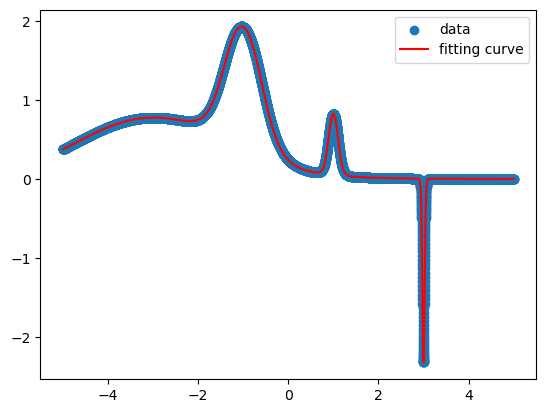

In [214]:
# graph 
def draw_graph(a):
    x = torch.linspace(-5,5,100000)
    y = torch.zeros_like(x)
    for b in range(7):
        for c in range(7):
            j = b - 3
            k = c - 3
            y += a[b][c] * bump((2**j) * (x - k))

    # plot input and output with green color
    plt.scatter(inputs,outputs, label='data')
    plt.plot(x,y,'r-', label='fitting curve')
    plt.legend()
    plt.show()

with torch.no_grad():
    draw_graph(params)

![Figure_1_right](./data/2-2.png)  

2. Given the dataset containing pairs of inputs $x$ (2-2-x.txt) and outputs $f(x)$ (2-2-f x.txt), determine $c_{jk}$. This produces Figure 1 (right).

In [10]:
import matplotlib.pyplot as plt
import math

inputs = load_data("./data/2-2-x.txt")
outputs = load_data("./data/2-2-f_x.txt")

def bump(x):
    return (1 - 1/(1+torch.exp(-1*((10*x)-2)))) * (1 - 1/(1+torch.exp(10*x+2))) 

def func(a,x):
    n = len(a)
    y = torch.zeros_like(x)
    for b in range(n):
        for c in range(n):
            j = b - 3
            k = c - 3
            y += a[b][c] * bump((2**j) * (x - k))
    return y

def autograd():
    poly_deg = 7
    a = torch.rand([poly_deg, poly_deg],requires_grad = True)
    data = inputs
    label = outputs

    # optimizer = torch.optim.SGD([a],lr=0.1)
    optimizer = torch.optim.Adam([a],lr=1)

    for k in range(5000):
        optimizer.zero_grad()
        pred = func(a,data)
        loss = torch.mean((label-pred)**2)
        loss.backward()
        optimizer.step()

        if k%100==0:
            print('loss ',loss.item())
    
    print('loss ',loss.item())
    return a;

params = autograd()
# print(params)
# params = torch.round(params)
print(params)

loss  7.535065174102783
loss  0.002882269211113453
loss  0.001300795003771782
loss  0.0006951302639208734
loss  0.00038532514008693397
loss  0.00022798762074671686
loss  0.000143809404107742
loss  9.373747889185324e-05
loss  6.141827907413244e-05
loss  4.0039929444901645e-05
loss  2.6072348191519268e-05
loss  1.717069790174719e-05
loss  0.6375784277915955
loss  2.2902566342963837e-05
loss  6.8123995333735365e-06
loss  5.700362180505181e-06
loss  0.00012178234464954585
loss  4.332731805334333e-06
loss  3.961836682719877e-06
loss  0.0025943289510905743
loss  3.5868001759808976e-06
loss  3.4215281630167738e-06
loss  0.006258685141801834
loss  7.113887477316894e-06
loss  3.193088105035713e-06
loss  3.148644736938877e-06
loss  0.0009578471072018147
loss  3.11224448523717e-06
loss  3.048019607376773e-06
loss  0.34681132435798645
loss  3.1458941975870403e-06
loss  2.9834109227522276e-06
loss  2.9642121717188274e-06
loss  0.002436018083244562
loss  3.01616137221572e-06
loss  2.915849336204701e

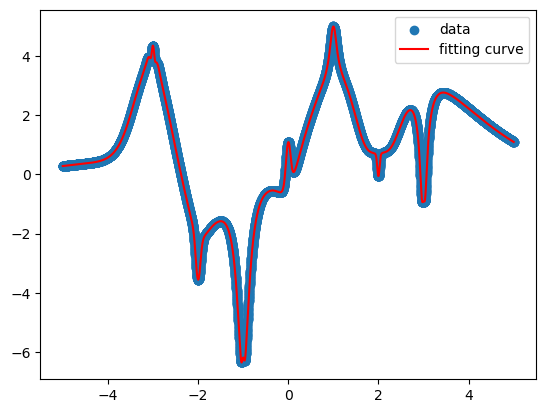

In [11]:
# graph 
def draw_graph(a):
    x = torch.linspace(-5,5,100000)
    y = torch.zeros_like(x)
    for b in range(7):
        for c in range(7):
            j = b - 3
            k = c - 3
            y += a[b][c] * bump((2**j) * (x - k))

    # plot input and output with green color
    plt.scatter(inputs,outputs, label='data')
    plt.plot(x,y,'r-', label='fitting curve')
    plt.legend()
    plt.show()

with torch.no_grad():
    draw_graph(params)


3. How do the parameters j, k, and c impact the bump function?

j controls the width of the bump function.  
k controls the location of the bump function. (i.e. the position on the x-axis)  
c controls the weight of the bump function (i.e the height).  

# Question 3
For the training data points, use the following 4 points: $[0.1, 0.19], [0.2, 0.18], [0.3, 0.36], [0.4, 0.33]$. 
Plot these 4 data points and use your eyes to look at their trend. Do they fall approximately in a linear curve?



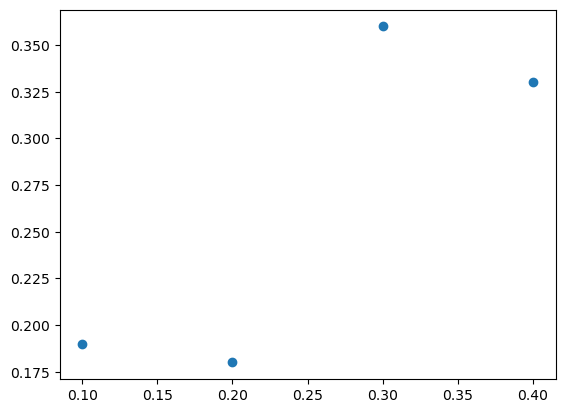

In [186]:
# graph 
def draw_graph(a):
    # plot [0.1, 0.19], [0.2, 0.18], [0.3, 0.36], [0.4, 0.33]$
    x = torch.linspace(0.1,0.4,4)
    y = torch.tensor([0.19, 0.18, 0.36, 0.33])
    
    plt.scatter(x,y)
    plt.show()

with torch.no_grad():
    draw_graph(params)

Perform polynomial fit on the training data for the polynomial degree of 1, 2, 4, 8, 16, 32, 64 using mean square error loss on the 4 data points,
$$ L = \sum_{i=1}^4 (\^f(x_i) - y_i)^2 \tag{3} $$

In [92]:
def basis(d, a, x):
    r = torch.zeros_like(x)
    for i in range(d+1):
        r += a[i]*x**i
    return r

def data():
    inputs = torch.tensor([0.1, 0.2, 0.3, 0.4])
    expected = torch.tensor([0.19, 0.18, 0.36, 0.33])
    return inputs, expected

def autograd(d, a):
    inputs, expected = data()
    num_epochs = 1000

    for epoch in range(num_epochs):
        optimizer.zero_grad()
        predicted = basis(d,a,inputs)
        loss = criterion(predicted, expected)
        loss.backward()
        optimizer.step()

        # if epoch % 100 == 0:
        #     print('epoch {}, loss {}'.format(epoch, loss.item()))

    return a

def criterion(predicted, expected):
    return torch.mean((expected-predicted)**2)

polys = [1,2,4,8,16,32,64]
models = {}
for degree in polys:
    models[degree] = []

for degree in polys:
    for i in range(10):
        a = torch.rand([degree+1],requires_grad = True)
        optimizer = torch.optim.Adam([a],lr=1)
        a = autograd(degree, a)
        models[degree].append(a)

In [80]:
x, _ = data()
degree = 4
print(basis(degree,models[degree][0], x))
print(basis(degree,models[degree][1], x))
print(basis(degree,models[degree][2], x))
print(basis(degree,models[degree][3], x))
print(basis(degree,models[degree][4], x))
print(basis(degree,models[degree][5], x))

tensor([0.1687, 0.2338, 0.3148, 0.3426], grad_fn=<AddBackward0>)
tensor([0.1700, 0.2306, 0.3176, 0.3418], grad_fn=<AddBackward0>)
tensor([0.1706, 0.2292, 0.3188, 0.3415], grad_fn=<AddBackward0>)
tensor([0.1690, 0.2333, 0.3153, 0.3424], grad_fn=<AddBackward0>)
tensor([0.1692, 0.2326, 0.3158, 0.3423], grad_fn=<AddBackward0>)
tensor([0.1705, 0.2295, 0.3185, 0.3415], grad_fn=<AddBackward0>)


$\^f$ is the polynomial fit result. For each polynomial fit, repeat the fitting 10 times to get 10 models for each polynomial degree. Therefore you will get a total of 10 × 7 models. For each model, compute the following test loss,
$$ L = \int_{-5}^{5} (\^f(x) - g(x))^2dx \tag{4}$$
where $g(x) = 0.6x + 0.1$. You will need to do numerical integration with bin size $\Delta x = 0.01$ and loss
$$ L = \sum_{i=0}^{1000} (\^f(i\Delta x - 5) - g(i \Delta x - 5))^2 \Delta x \tag{5}$$

1. Make a plot of training loss versus the degree of polynomial. What do you observe? Explain the observation.

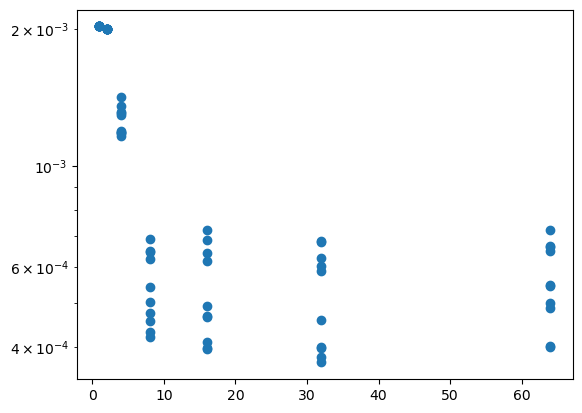

In [93]:
def plot():
    inputs, expected = data()

    x = []
    y = []

    for degree in polys:
        for i in range(10):
            prediction = basis(degree,models[degree][i], inputs)
            loss = criterion(prediction, expected)
            x.append(degree)
            y.append(loss)

    plt.scatter(x,y)
    plt.yscale("log")

with torch.no_grad():
    plot()

Generally, the greater the polynomial degree, the lower the training loss. This however, starts to plateau at around degree = 16.

With regards to the relationship between polynomial degree and training loss, it makes sense that the training loss would reduce the more degrees we add as a greater polynomial degree essentially means more bump functions to better fit the curve on. This would stand in constrast with degree = 1 or 2 where it is difficult to fit the curve as you can only move the line or bend the curve so much. 

Past degree = 16, it would seem like we generally have enough parameters to closely fit the 4 point training set which is why adding more parameters doesn't really result in a lower training loss anymore. 

The variation in the output from the different models also seems to increase the greater the polynomial degree. This is likely due to the fact that with more parameters, we have more ways to fit the curve.

2. Make a plot of testing loss versus the degree of polynomial. Include the standard deviation of the test loss in the graph. What do you observe? Explain the observation.

In [82]:
def g(x):
    return 0.6 * x + 1
def f(d,a,x):
    return basis(d,a,x)

def test_loss(d, a):
    dx = torch.zeros(1)
    training_loss = 0
    for i in range(1000):
        dx += 0.01
        training_loss += (f(d, a, dx-5) - g(dx-5)) ** 2 * 0.01

    return training_loss

def compute_losses():
    test_losses = []
    for poly_deg in polys:
        degree_losses = []
        for i in range(10):
            a = models[poly_deg][i]
            # x = torch.cat((x, torch.tensor([poly_deg])), dim=0)
            degree_losses.append(test_loss(poly_deg, a))
            # y = torch.cat((y,compute_test_loss(poly_deg, a)), dim=0)
        # print(test_losses)
        test_losses.append(torch.cat(degree_losses, dim=0)) 
    
    return test_losses

test_losses = compute_losses()   


poly_deg: 1
mean: tensor(7.8322)
std: tensor(2.2478e-07)
poly_deg: 2
mean: tensor(401.2677)
std: tensor(0.3401)
poly_deg: 4
mean: tensor(88577200.)
std: tensor(23856514.)
poly_deg: 8
mean: tensor(2.6045e+14)
std: tensor(6.1408e+13)
poly_deg: 16
mean: tensor(2.9851e+25)
std: tensor(4.1822e+24)
poly_deg: 32
mean: tensor(inf)
std: tensor(nan)
poly_deg: 64
mean: tensor(nan)
std: tensor(nan)


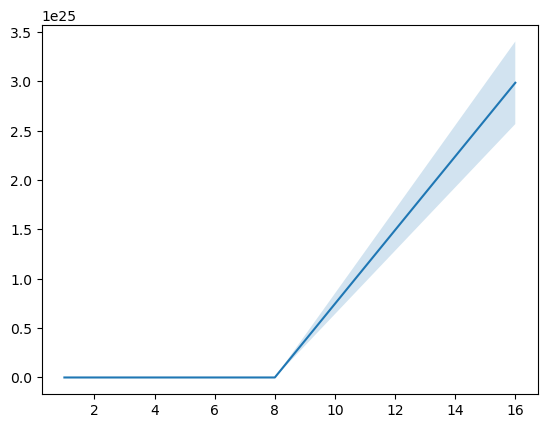

In [85]:
with torch.no_grad():

    means = []
    std = []

    # calc mean and sd
    for i in range(len(polys)):
        print("poly_deg:", polys[i])
        print("mean:", torch.mean(test_losses[i]))
        means.append(torch.mean(test_losses[i]))
        print("std:", torch.std(test_losses[i]))
        std.append(torch.std(test_losses[i]))

    x = torch.tensor(polys)
    # x = torch.tensor([1,2,4]) 
    means = torch.tensor(means)
    # extract first 4 items from means
    # means = means[:3]
    std = torch.tensor(std)
    # std = std[:3]

    # plt.yscale("symlog")
    plt.plot(x, means)
    plt.fill_between(x, means-std, means+std, alpha=0.2)
    plt.show()

    

| Degree | Mean       | Std        |
| ------ | ---------- | ---------- |
| 1      | 7.8322     | 2.2478e-07 |
| 2      | 401.2677   | 0.3401     |
| 4      | 88577200   | 23856514   |
| 8      | 2.6045e+14 | 6.1408e+13 |

The mean and standard deviation of the test loss is the smallest with polynomial degree = 1, which makes sense as the curve most closely approximates g(x).

For polynomial degrees > 1, the model starts to overfit and the testing loss starts to increase exponentially. The standard deviation also starts to get wider the more we overfit the function with higher polynomial degrees.

The reason why overfitting is happening in this instance is due to the fact that the training data set is too small and doesn't contain enough data samples to accurately represent the expected outcomes. This results in a large number of possible ways to fit on the training set, and in turn causes a large standard deviation in the output models. This is worse for larger polynomial degrees as they have more parameters to tune around and thus more ways to fit on the training set.

# Question 4

A series of compute trees are given. Make the code that generates these trees. For checking, you may use the following code:

In [4]:
from torchviz import make_dot
def print_compute_tree(name,node):
    dot = make_dot(node)
    dot.render(name)

For the operations that require a constant, use the value of 5.
  
![Figure_2.png](./figures/Figure_2.png)
1. Make code that generates `Figure 2`. Additionally, when both the inputs are `[1, 2, 3]`, the output is `[20.8, 161.6, 542.4]`. Submit the output of the operation when the inputs are `[4, 5, 6]`.

tensor([1283.2000, 2504.0000, 4324.7998], grad_fn=<MulBackward0>)


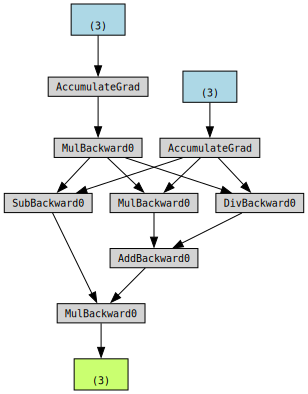

In [6]:
X = torch.tensor([4,5,6],dtype=torch.float32, requires_grad=True) 
Y = torch.tensor([4,5,6],dtype=torch.float32, requires_grad=True)  
T_1 = X * 5 # mulbackward
T_2 = T_1 - Y  # subbackward
T_3 = T_1 * Y   # mulbackward
T_4 = Y / T_1    # divbackward
T_5 = T_4 + T_3 # addbackward
T_6 = T_2 * T_5   # mulbackward
print(T_6)
make_dot(T_6)

![Figure_3](./figures/Figure_3.png)  

2. Make code that generates `Figure 3`. Additionally, when both the inputs are `[1, 2, 3]`, the output is `[0.0035, 0.0026, 0.0021]`. Submit the output of the operation when the inputs are `[4, 5, 6]`.

tensor([0.0017, 0.0014, 0.0012], grad_fn=<DivBackward0>)


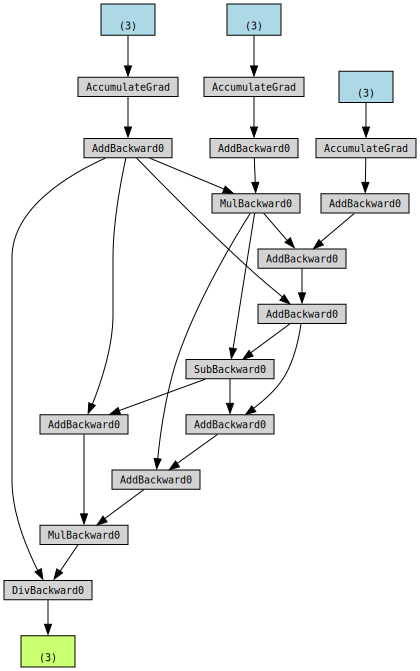

In [15]:
X = torch.tensor([4,5,6],dtype=torch.float32, requires_grad=True) 
Y = torch.tensor([4,5,6],dtype=torch.float32, requires_grad=True)  
Z = torch.tensor([4,5,6],dtype=torch.float32, requires_grad=True)   
X_1 = X + 5 # addbackward
Y_1 = Y + 5 # addbackward 
Z_1 = Z + 5 # addbackward
XY_1 = X_1 * Y_1 # multbackward
XYZ_1 = Z_1 + XY_1 
XYZ_2 = X_1 + XYZ_1
XYZ_3 = XYZ_2 - XY_1
XYZ_4 = XYZ_3 + XYZ_2
XYZ_4_1 = XYZ_3 + X_1
XYZ_5 = XYZ_4 + XY_1
XYZ_6 = XYZ_5 * XYZ_4_1
U =  X_1 / XYZ_6

print(U)
make_dot(U)

![Figure_4](./figures/Figure_4.png)  

3. Make code that generates `Figure 4.` Additionally, when both the inputs are `[1, 2, 3]`, the output is `[−104, −1188, −6468]`. Submit the output of the operation when the inputs are `[4, 5, 6]`.

T_8_1 tensor([  -248.,  -2322., -11172.], grad_fn=<MulBackward0>)


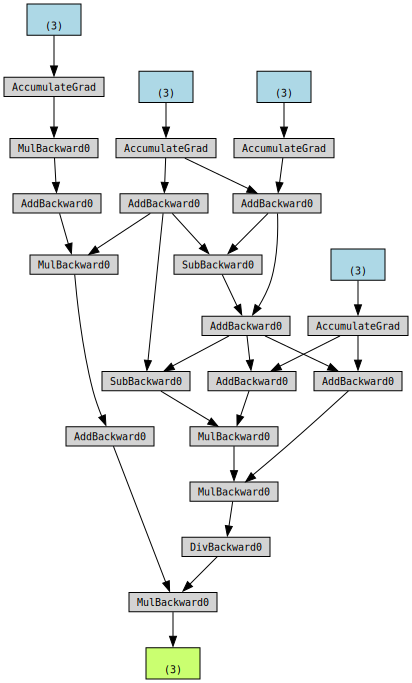

In [16]:
X = torch.tensor([4,5,6],dtype=torch.float32, requires_grad=True) 
Y = torch.tensor([1,2,3],dtype=torch.float32, requires_grad=True)  
Z = torch.tensor([1,2,3],dtype=torch.float32, requires_grad=True)
A = torch.tensor([1,2,3],dtype=torch.float32, requires_grad=True)
T_1_1 = X * 5 + 5
T_1_2 = Y + 5
T_1_3 = Z + Y
T_2_1 = T_1_1 * T_1_2
T_2_2 = T_1_3 - T_1_2
T_3_1 = T_1_3 + T_2_2
T_4_1 = T_3_1 - T_1_2 
T_4_2 = T_3_1 + A
T_4_3 = T_3_1 + A
T_5_1 = T_2_1 + 5
T_5_2 = T_4_1 * T_4_2
T_6_1 = T_5_2 * T_4_3
T_7_1 = T_6_1 / 5
T_8_1 = T_7_1 * T_5_1

print("T_8_1", T_8_1)
make_dot(T_8_1)

# Question 5

Consider the network shown in Fig.5. Given a data x ∈ R and label y ∈ R. And the activations are given by
$$ z_1 = w_1x + b_1  \tag{6}$$
$$ a_1 = \sigma (z_1) \tag{7}$$
$$ z_2 = w_2a_1+b_2 \tag{8}$$
$$ a_2 = \sigma (z_2) \tag{9}$$
$$ z_3 = w_3a_2 + b_3 \tag{10}$$
$$ a_3 = \sigma (z_3) \tag{11}$$

Using mean square error to minimize loss,
$$ L = (a_3 - y)^2 \tag{12}$$
Compute the following in symbolic form in terms of $a$, $y$, and $x$,

$$ \begin{align} & \frac{\partial L}{\partial w_i} & \text{for i=1,2,3} \tag{13} \end{align}$$



$$ 
\frac{\partial L}{\partial w_1} = \frac{\partial z_1}{\partial w_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial L}{\partial a_1} 
= x \cdot \sigma'(z_1) \cdot 2(a_1 - y)
$$
$$ 
\frac{\partial L}{\partial w_2} = \frac{\partial z_2}{\partial w_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot \frac{\partial L}{\partial a_2} 
= a_1 \cdot \sigma'(z_2) \cdot 2(a_2 - y)
$$
$$ 
\frac{\partial L}{\partial w_3} = \frac{\partial z_3}{\partial w_3} \cdot \frac{\partial a_3}{\partial z_3} \cdot \frac{\partial L}{\partial a_3} 
= a_2 \cdot \sigma'(z_3) \cdot 2(a_3 - y)
$$

$$ \begin{align} & \frac{\partial L}{\partial b_i} & \text{for i=1,2,3} \tag{14} \end{align}$$ 

$$ 
\frac{\partial L}{\partial b_1} = \frac{\partial z_1}{\partial b_1} \cdot \frac{\partial a_1}{\partial z_1} \cdot \frac{\partial L}{\partial a_1} 
= 1 \cdot \sigma'(z_1) \cdot 2(a_1 - y)
$$
$$ 
\frac{\partial L}{\partial b_2} = \frac{\partial z_2}{\partial b_2} \cdot \frac{\partial a_2}{\partial z_2} \cdot \frac{\partial L}{\partial a_2} 
= 1 \cdot \sigma'(z_2) \cdot 2(a_2 - y)
$$
$$ 
\frac{\partial L}{\partial b_3} = \frac{\partial z_3}{\partial b_3} \cdot \frac{\partial a_3}{\partial z_3} \cdot \frac{\partial L}{\partial a_3} 
= 1 \cdot \sigma'(z_3) \cdot 2(a_3 - y)
$$

Now let $x=1.0, w_1 =0.1, b_1 =0, w_2 = −0.2, b_2 = 0.1, w_3 = −0.1, b_3 = 0.2, y = 1$. Let $\sigma$ be the sigmoid function.

1. Compute $a_i$, for $i = 1,2,3$.

$$a_1 = \sigma((0.1)(1.0) + 0)) = 0.52498$$
$$a_2 = \sigma((-0.2)(a_1) + 0.1)) = 0.49875$$  
$$a_3 = \sigma((-0.1)(a+2) + 0.2)) = 0.53746$$

2. Compute $L$.


$$L = (a_3 - 1)^2 = 0.21394$$

3. Compute the gradients $\frac{\partial L}{\partial w_i}$ and $\frac{\partial L}{\partial b_i}$, for $i = 1, 2, 3$

$$
\sigma'(u) = \frac{exp(u)}{(1+exp(u))^2} 
$$
$$ 
\frac{\partial L}{\partial w_1} = x \cdot \sigma'(z_1) \cdot 2(a_1 - y) = -0.47266
$$
$$ 
\frac{\partial L}{\partial w_2} = a_1 \cdot \sigma'(z_2) \cdot 2(a_2 - y) = -0.26314
$$
$$ 
\frac{\partial L}{\partial w_3} = a_2 \cdot \sigma'(z_3) \cdot 2(a_3 - y) = -0.22812
$$
$$ 
\frac{\partial L}{\partial b_1} = 1 \cdot \sigma'(z_1) \cdot 2(a_1 - y) = -0.47266
$$
$$ 
\frac{\partial L}{\partial b_2} = 1 \cdot \sigma'(z_2) \cdot 2(a_2 - y) = -0.50124
$$
$$ 
\frac{\partial L}{\partial b_3} = 1 \cdot \sigma'(z_3) \cdot 2(a_3 - y) = -0.45738
$$